In [7]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-07-31 22:59:37--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  2.24MB/s    in 59s     

2020-07-31 23:00:36 (5.22 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [5]:
# karena diharuskan untuk membagi dataset maka saya mencoba untuk mengimport data dari local
from google.colab import files
files.upload()

Saving images.zip to images.zip


In [1]:
# melakukan ekstraksi pada file zip
import zipfile,os
local_zip = 'images.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [27]:
os.listdir('/tmp/images/train')

['rock', 'paper', 'scissors']

In [28]:
os.listdir('/tmp/images/val')

['rock', 'paper', 'scissors']

In [29]:
# membuat direktori batu pada direktori data training
train_rock_dir = os.path.join(train_dir, 'rock')
 
# membuat direktori kertas pada direktori data training
train_paper_dir = os.path.join(train_dir, 'paper')

# membuat direktori gunting pada direktori data training
train_scissors_dir = os.path.join(train_dir, 'scissors')

# membuat direktori batu pada direktori data validasi
validation_rock_dir = os.path.join(validation_dir, 'rock')
 
# membuat direktori kertas pada direktori data validasi
validation_paper_dir = os.path.join(validation_dir, 'paper')

# membuat direktori gunting pada direktori data validasi
validation_scissors_dir = os.path.join(validation_dir, 'scissors')

In [30]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
 
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [32]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(152, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4,
        # karena kita merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir, # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4, # karena kita merupakan masalah klasifikasi 3 kelas maka menggunakan class_mode = 'binary'
        class_mode='categorical')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [34]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [35]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [36]:
model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=20,
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2)

Epoch 1/20
25/25 - 6s - loss: 1.1497 - accuracy: 0.3100 - val_loss: 1.0983 - val_accuracy: 0.2500
Epoch 2/20
25/25 - 6s - loss: 1.0996 - accuracy: 0.3800 - val_loss: 1.0861 - val_accuracy: 0.3500
Epoch 3/20
25/25 - 6s - loss: 1.1042 - accuracy: 0.2600 - val_loss: 1.1016 - val_accuracy: 0.0500
Epoch 4/20
25/25 - 6s - loss: 1.0947 - accuracy: 0.3700 - val_loss: 1.1380 - val_accuracy: 0.3000
Epoch 5/20
25/25 - 6s - loss: 1.1190 - accuracy: 0.3500 - val_loss: 1.0924 - val_accuracy: 0.6500
Epoch 6/20
25/25 - 6s - loss: 1.0969 - accuracy: 0.4184 - val_loss: 1.0964 - val_accuracy: 0.4000
Epoch 7/20
25/25 - 6s - loss: 1.1078 - accuracy: 0.3800 - val_loss: 1.0894 - val_accuracy: 0.4500
Epoch 8/20
25/25 - 11s - loss: 1.0918 - accuracy: 0.3300 - val_loss: 1.0602 - val_accuracy: 0.4000
Epoch 9/20
25/25 - 9s - loss: 1.0334 - accuracy: 0.4900 - val_loss: 0.8431 - val_accuracy: 0.6000
Epoch 10/20
25/25 - 6s - loss: 1.0239 - accuracy: 0.5600 - val_loss: 0.7908 - val_accuracy: 0.6500
Epoch 11/20
25/25 

Saving 1wk2Hl1Ih9guOwx6.png to 1wk2Hl1Ih9guOwx6.png
1wk2Hl1Ih9guOwx6.png


ValueError: ignored

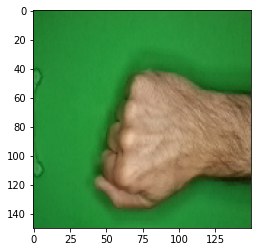

In [41]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes==0:
    print('rock')
  elif classes==1:
    print('papper')
  else:
    print('scissors')

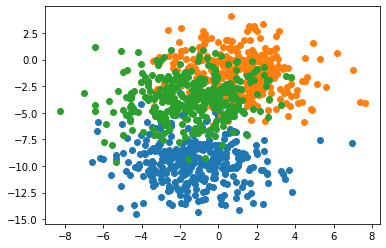

In [38]:
# scatter plot of blobs dataset
from sklearn.datasets import make_blobs
from matplotlib import pyplot
from numpy import where
# generate 2d classification dataset
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
# scatter plot for each class value
for class_value in range(3):
	# select indices of points with the class label
	row_ix = where(y == class_value)
	# scatter plot for points with a different color
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show plot
pyplot.show()